In [1]:
from mpl_toolkits.mplot3d import Axes3D
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16.8,6.72
rcParams['savefig.transparent'] = True
import math
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn
from scipy.stats import zscore
import somoclu
import seaborn
#import Orange
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent
from Orange.projection.pca import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn.utils import shuffle
from sklearn.neighbors.kde import KernelDensity
from time import time
import sompy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy

C:\Anaconda2\envs\py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [214]:
filedata= 'D:/Development/mestrado/uma/dataset/callsinfo.csv'
#filedata= 'D:/Development/mestrado/uma/dataset/raw_callsinfo.csv'
df = pd.read_csv(filedata, engine='python', sep=';')
df.head()


,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance,FaultCause
0,0.853,0.609,-66.728,-20.042,10.836,148.692,0.713,1
1,0.909,0.800,-61.816,-19.071,15.236,205.652,0.601,1
2,0.963,0.818,-61.778,-18.862,16.395,251.339,0.587,1
3,0.940,0.889,-63.843,-19.436,14.816,232.213,0.586,1
4,0.952,0.900,-61.796,-19.403,14.402,191.574,0.629,1


In [171]:
sorted_df = df.sort_values('FaultCause')
base = shuffle(sorted_df[0:len(sorted_df)-2900])
t1 = base[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].apply(zscore)
t1['FaultCause'] = base['FaultCause'].values
# create design matrix X and target vector y
X = np.array(t1.ix[:, 0:7]) 	# end index is exclusive
y = np.array(t1['FaultCause']) 	# another way of indexing a pandas df
X = X.astype('float32')
y = y.astype('float32')
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [193]:
sorted_df = df.sort_values('FaultCause')
df = shuffle(sorted_df[0:len(sorted_df)-3000])
print(0.33*len(df))

547.47


In [194]:
train_samples = 548
t1_train = df[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]][0:train_samples].apply(zscore)
t1_test = df[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]][train_samples:len(df)].apply(zscore)
X_train = np.array(t1_train)
X_train = X_train.astype('float32')
X_test = np.array(t1_test)
X_test = X_test.astype('float32')

y_train=np.array(df['FaultCause'][0:train_samples])
y_train = y_train.astype('float32')

y_test=np.array(df['FaultCause'][train_samples:len(df)])
y_test = y_test.astype('float32')

#t1['FaultCause'] = df['FaultCause'].values
#shuffle(t1)
train_df = df[0:train_samples]
test_df = df[train_samples:len(df)]

In [195]:
train_df = df[0:train_samples]
test_df = df[train_samples:len(df)]
X_train.shape
#X_test.shape

(548, 7)

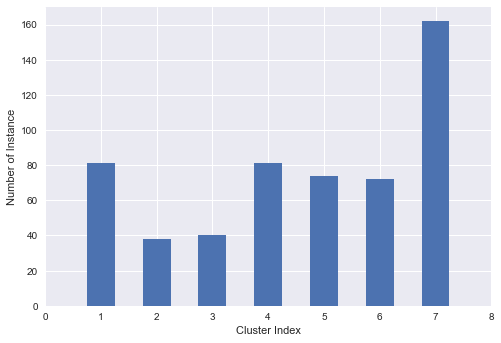

In [196]:
hist, bin_edges = np.histogram(y_train, bins = range(9))
plt.bar(bin_edges[:-1], hist, width = 0.5)
plt.xlim(min(bin_edges), max(bin_edges))
#fig.set_xticklabels(x_labels)
plt.xlabel('Cluster Index')
plt.ylabel('Number of Instance')
plt.show()

In [197]:
#n_rows, n_columns = 100, 160
n_rows, n_columns = 9,11
#som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False,initialization="pca",gridtype='rectangular',neighborhood='bubble')
#%time som.train(dataset,epochs=1000, radius0=10, radiusN=2, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')
%time som.train(X_train,epochs=20000, radius0=3, radiusN=1, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')

Wall time: 45.2 s


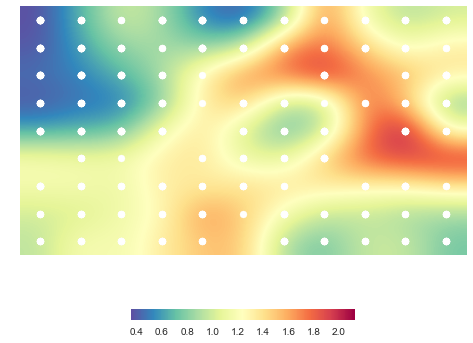

<module 'matplotlib.pyplot' from 'C:\\Anaconda2\\envs\\py36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [198]:
som.view_umatrix(bestmatches=True,colorbar=1)

In [199]:
bmus = som.get_bmus(som.get_surface_state())

In [200]:
X_train.shape
bmus[0]

array([2, 2], dtype=int64)

In [201]:
def cluster_data(bmus,clusters,n_rows, n_columns):
    cluster_data = []
    row, column = bmus.shape
    cr = clusters.reshape(n_rows,n_columns)
    for r in range(row):
        cluster_data.append(cr[bmus[r][1]][bmus[r][0]])##aparentemente a funcao get_bmus retorna (coluna,linha)
    return cluster_data

In [202]:
W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))

In [203]:
# generate the linkage matrix
Z = linkage(W, 'ward')

In [204]:
#This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances
c, coph_dists = cophenet(Z, pdist(W))
c

0.66508690677419102

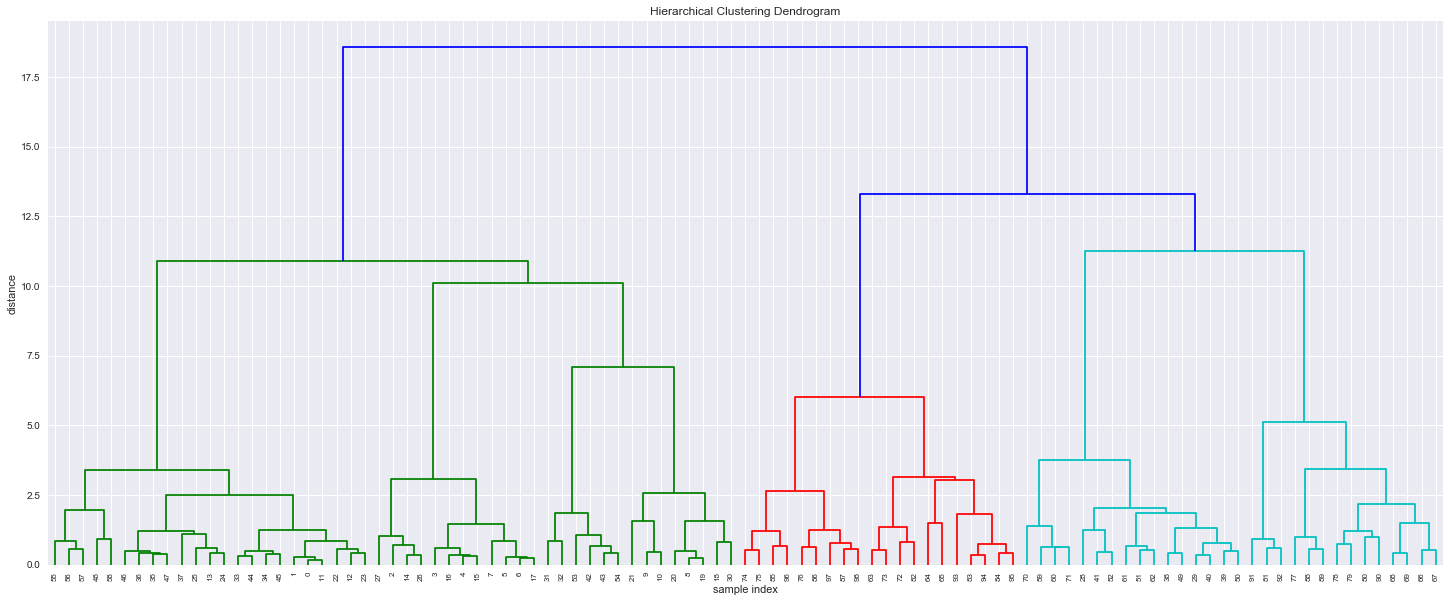

In [205]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

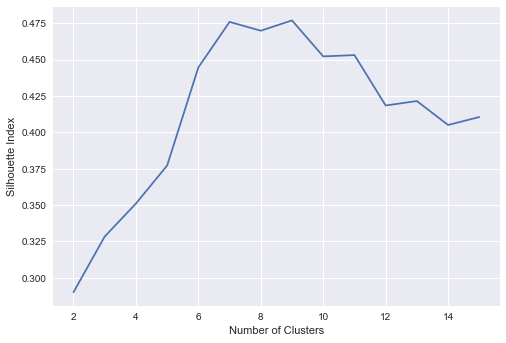

In [206]:
k = []
si = []
#sklearn.metrics.silhouette_score(W, ss, metric='sqeuclidean')
for n in range(15,1,-1):
    clusters = fcluster(Z, n, criterion='maxclust')
    ss = sklearn.metrics.silhouette_score(W, clusters,metric='euclidean')
    k.append(n)
    si.append(ss)
    #print(n,ss)
plt.plot(k, si)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Index')
plt.show()

In [211]:
clusters = fcluster(Z, 7, criterion='maxclust')

In [212]:
W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))
X = X_test
D = -2*np.dot(W, X.T) + (W**2).sum(1)[:, None] + (X**2).sum(1)[:, None].T
BMU = (D==D.min(0)[None,:]).astype("float32").T
NBMU =  BMU.reshape((X.shape[0], som.codebook.shape[0], som.codebook.shape[1]))
new_bmus = np.vstack(NBMU.nonzero()[1:][::-1]).T

In [213]:
fcluster(Z, 7, criterion='maxclust')

array([1, 1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 1, 1, 1, 2, 2, 2, 2, 4, 4, 4, 4, 1,
       1, 1, 1, 2, 2, 6, 6, 4, 3, 3, 1, 1, 1, 1, 1, 6, 6, 6, 6, 3, 3, 1, 1,
       1, 1, 1, 6, 6, 6, 6, 3, 3, 1, 1, 1, 1, 6, 6, 6, 6, 5, 5, 5, 7, 7, 7,
       7, 6, 6, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7,
       7, 5, 5, 5, 5, 5, 5], dtype=int32)

In [210]:
cluster1 = cluster_data(bmus,clusters,10,10)
newcluster = cluster_data(new_bmus,clusters,10,10)
print(cluster1)
print(newcluster)

ValueError: cannot reshape array of size 99 into shape (10,10)

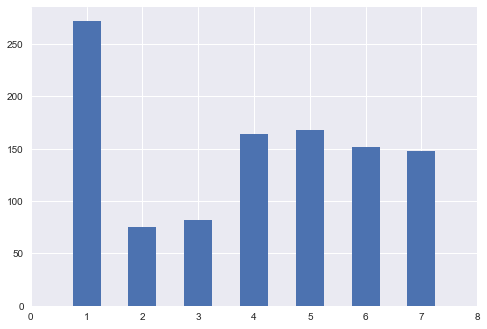

In [103]:
hist, bin_edges = np.histogram(cluster1, bins = range(9))
plt.bar(bin_edges[:-1], hist, width = 0.5)
plt.xlim(min(bin_edges), max(bin_edges))
#fig.set_xticklabels(x_labels)
plt.show() 

In [29]:
train_set = base[0:1111]
test_set = base[1111:len(base)]
print(len(train_set))
print(len(test_set))

1111
548


In [108]:
train_df
len(cluster1)

1061

In [110]:
#train_set
se = pd.Series(cluster1)
train_df['class'] = se.values

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [111]:
train_df.head()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance,FaultCause,class
1529,0.989,0.964,-73.318,-19.341,10.992,148.841,0.760,6,5
1341,1.000,1.000,-78.281,-17.917,14.578,94.191,1.167,5,4
1146,0.980,0.882,-73.102,-18.718,14.708,118.402,0.856,4,1
1175,0.996,0.989,-77.430,-18.469,12.142,78.935,1.334,5,4
103,1.000,1.000,-76.202,-18.045,12.828,85.262,1.373,5,4


In [114]:
train_df.groupby(['class'])[["Retainability", "HOSR", "RSRP","RSRQ","SINR","Throughput","Distance"]].mean()

,Retainability,HOSR,RSRP,RSRQ,SINR,Throughput,Distance
class,,,,,,,
1,0.992765,0.973518,-71.344901,-18.183945,14.852243,114.479357,0.907904
2,0.922413,0.950640,-72.047307,-18.038333,14.426160,103.836440,0.897827
3,0.934561,0.936854,-73.283744,-18.119866,6.995866,66.775415,0.892841
4,0.993421,0.983104,-77.606976,-18.150226,12.814860,83.209970,1.240750
5,0.975863,0.933542,-76.883089,-19.164435,9.799060,145.661518,0.713750
6,0.944743,0.631184,-72.462178,-19.268145,14.404763,104.205355,0.899796
7,0.945500,0.857851,-66.379601,-19.495946,13.249095,165.823399,0.629230


In [160]:
mapsize = [9,11]
som2 = sompy.SOMFactory.build(X_train, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='bubble', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som2.train(n_job=1, verbose='info',train_rough_len=100, train_finetune_len=200,
              train_rough_radiusin=3,
              train_rough_radiusfin=1,
              train_finetune_radiusin=1,
              train_finetune_radiusfin=0)  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
C:\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
 pca_linear_initialization took: 0.023000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.154000, quantization error: 1.522974

 epoch: 2 ---> elapsed time:  0.103000, quantization error: 1.240293

 epoch: 3 ---> elapsed time:  0.102000, quantization error: 1.104130

 epoch: 4 ---> elapsed time:  0.104000, quantization error: 1.047015

 epoch: 5 ---> elapsed time:  0.105000, quantization error: 0.991360

 epoch: 6 ---> elapsed time:  0.102000, quantization error: 0.978669

 epoch: 7 ---> elapsed time:  0.103000, quantization erro

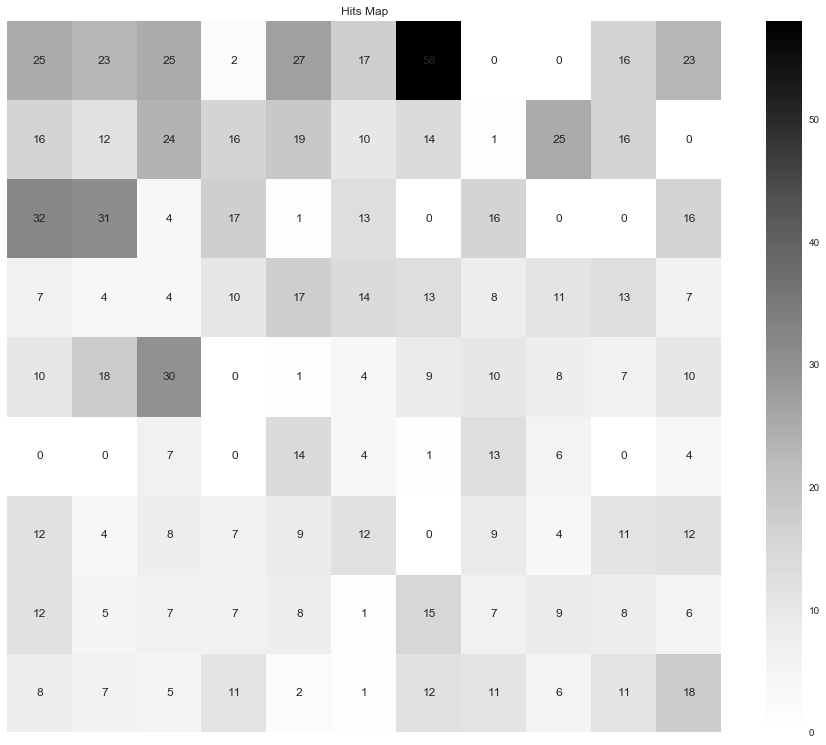

In [161]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(9,11,"Hits Map",text_size=12)
vhts.show(som2, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

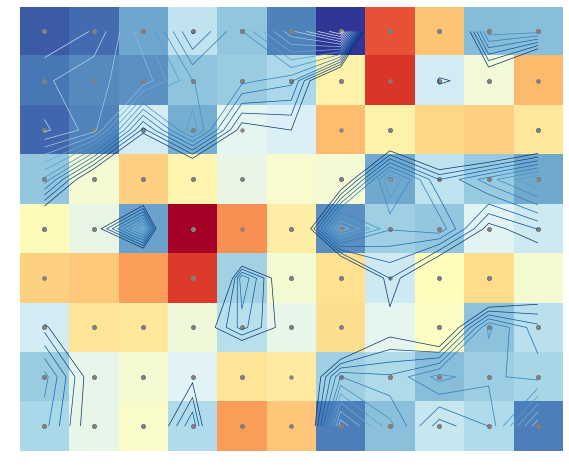

In [162]:
u = sompy.umatrix.UMatrixView(9, 11, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som2, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som2, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

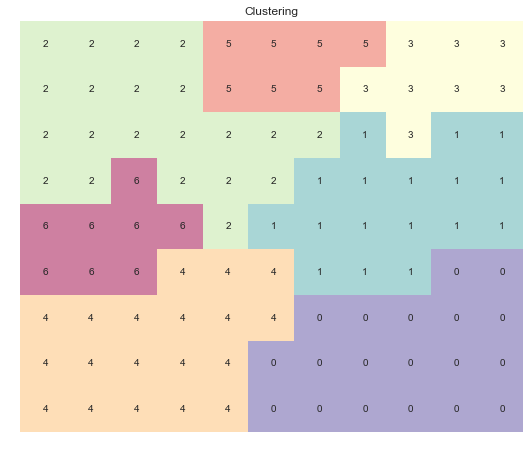

In [163]:
from sompy.visualization.hitmap import HitMapView
som2.cluster(7)
hits  = HitMapView(9,11,"Clustering",text_size=12)
a=hits.show(som2)